# RNN, LSTM Practice with a Sine Wave

### Práctica de Redes Neuronales Recurrentes y LSTM con una Onda Sinoidal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data generation

In [2]:
x = np.linspace(0, 50, 501)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y = np.sin(x)

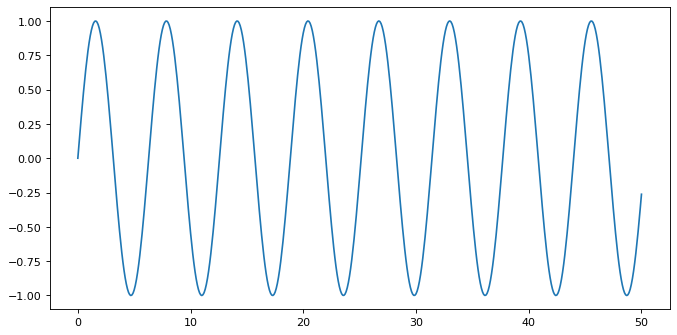

In [5]:
plt.figure(figsize=(10,5), dpi=80)
sns.lineplot(x,y);

In [6]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [7]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


### Train-Test Split

We need to decide what percentage of the end of the dataset are we going to use for testing. 

In [8]:
len(df)

501

In [9]:
test_percent = 0.1

**How many data points are 10%?**

In [10]:
np.round(len(df) * test_percent)

50.0

In [11]:
test_point = np.round(len(df) * test_percent)

In [12]:
test_point

50.0

**Calculate the cut off point, the index where the data will be split**

In [13]:
split_index = int(len(df) - test_point)

In [14]:
split_index

451

**Training Set**

Go all the way but don't include the split index point

In [15]:
train = df.iloc[:split_index]

In [16]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


_

**Test Set**

Starting at the split index point all the way to the end

In [17]:
test = df.iloc[split_index:]

In [18]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


_

### Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaled_train = scaler.fit_transform(train)

In [22]:
scaled_test = scaler.transform(test)

_

### Timeseries (Batch) Generator

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
length = 2
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size=batch_size)

In [25]:
len(scaled_train)

451

**len of generator is 451 - length**

In [26]:
len(generator)

449

**Check the first batch returned by the generator**

In [27]:
generator[0]

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [28]:
X, y = generator[0]

In [29]:
X

array([[[0.49999912],
        [0.54991622]]])

In [30]:
y

array([[0.59933458]])

**What does these values actually mean?**

In [31]:
scaled_train[:3]

array([[0.49999912],
       [0.54991622],
       [0.59933458]])

**For each 2 data points, the generator makes a prediction of the next number**

**The number 2 was determined by the length arg**

#### Now make a length of 50 to let the generator watch a full cycle

In [32]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size=batch_size)

In [33]:
len(generator)

401

In [34]:
generator[0]

(array([[[4.99999116e-01],
         [5.49916225e-01],
         [5.99334579e-01],
         [6.47760405e-01],
         [6.94709850e-01],
         [7.39713809e-01],
         [7.82322618e-01],
         [8.22110545e-01],
         [8.58680040e-01],
         [8.91665714e-01],
         [9.20737985e-01],
         [9.45606372e-01],
         [9.66022399e-01],
         [9.81782075e-01],
         [9.92727935e-01],
         [9.98750612e-01],
         [9.99789928e-01],
         [9.95835500e-01],
         [9.86926839e-01],
         [9.73152957e-01],
         [9.54651478e-01],
         [9.31607263e-01],
         [9.04250562e-01],
         [8.72854714e-01],
         [8.37733417e-01],
         [7.99237589e-01],
         [7.57751870e-01],
         [7.13690771e-01],
         [6.67494535e-01],
         [6.19624741e-01],
         [5.70559686e-01],
         [5.20789614e-01],
         [4.70811810e-01],
         [4.21125636e-01],
         [3.72227539e-01],
         [3.24606094e-01],
         [2.78737119e-01],
 

---

## Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

**The number of features we are trying to predict, in this case 1**

In [36]:
n_features = 1

In [37]:
model = Sequential()

units = 50
model.add(SimpleRNN(units, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit_generator(generator, epochs=5)

Epoch 1/5


C:\Users\USER\anaconda3\envs\tfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


401/401 [==============================] - 2s 3ms/step - loss: 0.0103
Epoch 2/5
401/401 [==============================] - 1s 3ms/step - loss: 6.5268e-04
Epoch 3/5
401/401 [==============================] - 1s 3ms/step - loss: 2.9843e-06
Epoch 4/5
401/401 [==============================] - 1s 3ms/step - loss: 7.8340e-06
Epoch 5/5
401/401 [==============================] - 1s 3ms/step - loss: 1.5940e-04


In [40]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss
0,0.002628
1,0.000612
2,0.000005
3,0.000010
4,0.000278


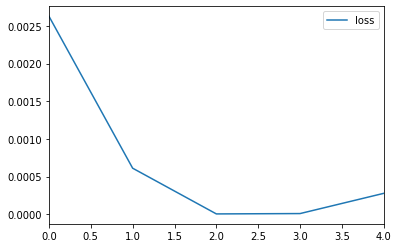

In [41]:
loss_df.plot()

**To test the model we are going to create a batch of the last 50 points in the scaled train set to predict one point into the future**

In [42]:
scaled_train[-length:]

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [43]:
first_eval_batch = scaled_train[-length:]

**Reshape it to the shape the model expects (1 , length, n_features)**

In [44]:
first_eval_batch = first_eval_batch.reshape((1 , length, n_features))

### Prediction

In [45]:
prediction = model.predict(first_eval_batch)
prediction

array([[0.971172]], dtype=float32)

## A loop to collect len(test) number of predictions

**Create an empty list for the test predictions**

**Grab the last points in the training batch and reshape it so the model can accept it**

**From that batch make a prediction of the next point and append it to the test predictions list**

**Then update/move the current batch to the next set of points**

**Loop will do this fo every point in the test set [for i in range(len(test))]**

In [46]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

**How does the update step work?**

In [47]:
current_batch.shape

(1, 50, 1)

In [48]:
current_batch[0]

array([[0.97117198],
       [0.99607623],
       [1.01804912],
       [1.03009915],
       [1.0402739 ],
       [1.03979146],
       [1.03783488],
       [1.02455842],
       [1.00750816],
       [0.98449695],
       [0.96030611],
       [0.92822331],
       [0.89410937],
       [0.8568306 ],
       [0.81669265],
       [0.77531999],
       [0.73244089],
       [0.68792456],
       [0.64373189],
       [0.5992763 ],
       [0.55491883],
       [0.51011044],
       [0.46725911],
       [0.42407727],
       [0.38318372],
       [0.34406221],
       [0.3080619 ],
       [0.27409816],
       [0.24358749],
       [0.21569659],
       [0.19107454],
       [0.17006435],
       [0.15303926],
       [0.13888536],
       [0.12875734],
       [0.12233564],
       [0.11869707],
       [0.1193111 ],
       [0.12261909],
       [0.12879696],
       [0.13795702],
       [0.149453  ],
       [0.16429423],
       [0.18137859],
       [0.20172901],
       [0.22381683],
       [0.24868965],
       [0.276

In [49]:
current_batch[:,1:,:]

array([[[0.99607623],
        [1.01804912],
        [1.03009915],
        [1.0402739 ],
        [1.03979146],
        [1.03783488],
        [1.02455842],
        [1.00750816],
        [0.98449695],
        [0.96030611],
        [0.92822331],
        [0.89410937],
        [0.8568306 ],
        [0.81669265],
        [0.77531999],
        [0.73244089],
        [0.68792456],
        [0.64373189],
        [0.5992763 ],
        [0.55491883],
        [0.51011044],
        [0.46725911],
        [0.42407727],
        [0.38318372],
        [0.34406221],
        [0.3080619 ],
        [0.27409816],
        [0.24358749],
        [0.21569659],
        [0.19107454],
        [0.17006435],
        [0.15303926],
        [0.13888536],
        [0.12875734],
        [0.12233564],
        [0.11869707],
        [0.1193111 ],
        [0.12261909],
        [0.12879696],
        [0.13795702],
        [0.149453  ],
        [0.16429423],
        [0.18137859],
        [0.20172901],
        [0.22381683],
        [0

**current_batch[:,1:,:] returns the batch, the array, without the first element**

**np.append appends elements to a given array**

**current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)**

**For every cycle in the loop, np.append updates the current_batch with a new current_batch consisting of the previous batch without the first element and with the next value appended**

_

### Test Predictions

In [50]:
test_predictions

[array([0.971172], dtype=float32),
 array([0.9960762], dtype=float32),
 array([1.0180491], dtype=float32),
 array([1.0300992], dtype=float32),
 array([1.0402739], dtype=float32),
 array([1.0397915], dtype=float32),
 array([1.0378349], dtype=float32),
 array([1.0245584], dtype=float32),
 array([1.0075082], dtype=float32),
 array([0.98449695], dtype=float32),
 array([0.9603061], dtype=float32),
 array([0.9282233], dtype=float32),
 array([0.89410937], dtype=float32),
 array([0.8568306], dtype=float32),
 array([0.81669265], dtype=float32),
 array([0.77532], dtype=float32),
 array([0.7324409], dtype=float32),
 array([0.68792456], dtype=float32),
 array([0.6437319], dtype=float32),
 array([0.5992763], dtype=float32),
 array([0.5549188], dtype=float32),
 array([0.51011044], dtype=float32),
 array([0.4672591], dtype=float32),
 array([0.42407727], dtype=float32),
 array([0.38318372], dtype=float32),
 array([0.3440622], dtype=float32),
 array([0.3080619], dtype=float32),
 array([0.27409816], dty

In [51]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [52]:
len(test_predictions)

50

In [53]:
len(test)

50

**Remember we are gonna compare our test predictions against the test set, thats why they need to be the same length, BUT test_predictions IS SCALED, TRANSFORM IT TO THE RIGHT SCALE**

In [54]:
real_predictions = scaler.inverse_transform(test_predictions)

**test is already a DataFrame, add a column with the predictions**

In [55]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [56]:
test['Predictions'] = real_predictions

C:\Users\USER\anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
test

,Sine,Predictions
45.1,0.899097,0.942338
45.2,0.938307,0.992146
45.3,0.968142,1.036092
45.4,0.988304,1.060192
45.5,0.998591,1.080541
45.6,0.998900,1.079576
45.7,0.989229,1.075663
45.8,0.969673,1.049110
45.9,0.940429,1.015010
46.0,0.901788,0.968988


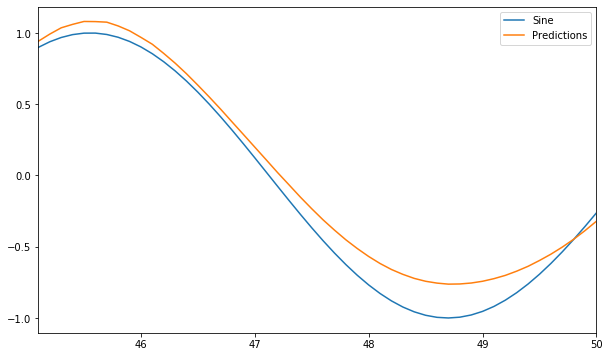

In [58]:
test.plot(figsize=(10,6));

### Behaviour is really good! But can it be improved?


-

#### How to use Early Stopping with a generator?

**We must create 2 generators, one for training and one for validation or test.**

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

**We redefine our generator to have a shorter length because with length 50, is the same as the len of scaled_test and the TimeSeriesgenerator expects length to be lower than the scaled_test**

In [61]:
length = 49
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size=batch_size)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                               length=length, batch_size=batch_size)


### Model Retraining with an LSTM

In [62]:
model = Sequential()

units = 50
model.add(LSTM(units, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [63]:
model.fit_generator(generator, epochs=20, validation_data=validation_generator,
                   callbacks=[early_stop])

C:\Users\USER\anaconda3\envs\tfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
402/402 [==============================] - 4s 7ms/step - loss: 0.0442 - val_loss: 8.0819e-05
Epoch 2/20
402/402 [==============================] - 3s 6ms/step - loss: 7.6340e-05 - val_loss: 9.7691e-05
Epoch 3/20
402/402 [==============================] - 3s 6ms/step - loss: 1.6206e-04 - val_loss: 3.3999e-06
Epoch 4/20
402/402 [==============================] - 3s 6ms/step - loss: 1.0939e-04 - val_loss: 2.0037e-09
Epoch 5/20
402/402 [==============================] - 3s 6ms/step - loss: 6.1263e-05 - val_loss: 7.6230e-05
Epoch 6/20
402/402 [==============================] - 3s 6ms/step - loss: 2.5626e-04 - val_loss: 1.1468e-05


---

### Model Performance

In [64]:
losses_df = pd.DataFrame(model.history.history)
losses_df

,loss,val_loss
0,0.015720,8.081884e-05
1,0.000086,9.769110e-05
2,0.000167,3.399855e-06
3,0.000087,2.003734e-09
4,0.000079,7.622998e-05
5,0.000199,1.146837e-05


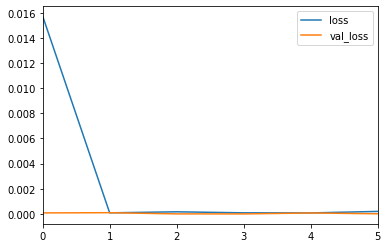

In [65]:
losses_df.plot()

In [66]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [67]:
real_lstm_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = real_lstm_predictions

C:\Users\USER\anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


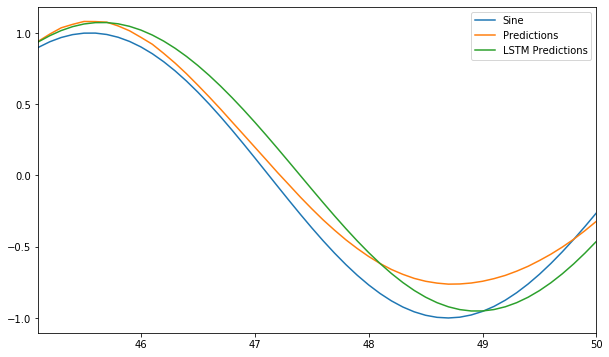

In [68]:
test.plot(figsize=(10,6));

---

## Forecasting into the future

**Data goes only to 50, what if we want to predict beyond that?**

**For forecasting we must retrain in the whole dataset**

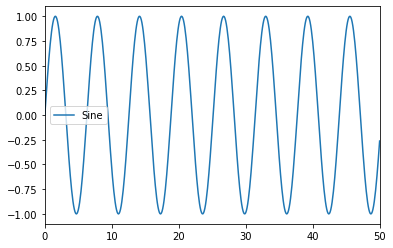

In [69]:
df.plot()

In [70]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [71]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [72]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

C:\Users\USER\anaconda3\envs\tfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/6
451/451 [==============================] - 4s 6ms/step - loss: 0.0267
Epoch 2/6
451/451 [==============================] - 3s 6ms/step - loss: 3.8177e-05
Epoch 3/6
451/451 [==============================] - 3s 6ms/step - loss: 7.2907e-05
Epoch 4/6
451/451 [==============================] - 3s 7ms/step - loss: 2.7108e-04
Epoch 5/6
451/451 [==============================] - 3s 6ms/step - loss: 6.3008e-04
Epoch 6/6
451/451 [==============================] - 3s 7ms/step - loss: 1.8110e-05


### Let's predict 25 into the future**

In [77]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [78]:
forecast = scaler.inverse_transform(forecast)

In [76]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


**First index in forecasted must be at 50.1**

**How to create an index for the predicted values?**

**The index is x = np.linspace(0, 50, 501), 500 elements within 0 - 50 range**

In [80]:
np.linspace(0, 50, 501)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

**If the step is .1, how to create a forecast index?**

**First multiply by the step**

In [79]:
len(forecast)

25

**When we do this we get the number to add to the last index, that's the range of the new index, from 50.1 to 52.6**

In [81]:
len(forecast) * 0.1

2.5

In [96]:
df.tail(1).index + .1

Float64Index([50.1], dtype='float64')

In [98]:
(df.tail(1).index + .1) + 2.5

Float64Index([52.6], dtype='float64')

In [100]:
forecasting_index = np.arange(50.1, 52.6, step=0.1)

In [101]:
len(forecasting_index)

25

## Plot the original wave plus the new forecasted values

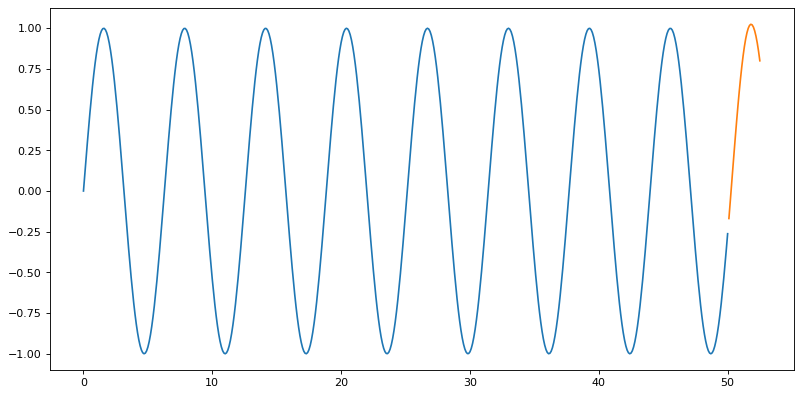

In [106]:
plt.figure(figsize=(12,6), dpi=80)
plt.plot(df)
plt.plot(forecasting_index, forecast);